<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/QC_Executing_Quantum_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

In [ ]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

References:
* https://qiskit.org/documentation/apidoc/execute.html
* https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html
* https://youtu.be/8mrPNSctRIg (transpile)


## Execute a quantum circuit

### Using the qiskit.execute()

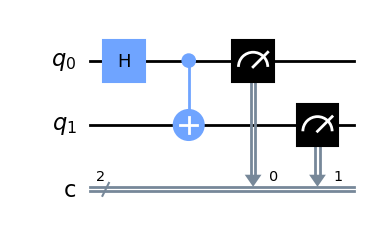

{'11': 4901, '00': 5099}


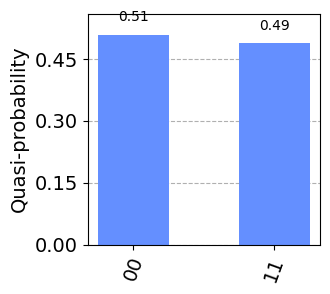

In [ ]:
#Using BasicAer to get a provider and execute the circuit
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.visualization import plot_distribution
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
display(qc.draw())

backend = BasicAer.get_backend("qasm_simulator")

job = execute(qc, backend, shots=10000)
result = job.result()
c = result.get_counts()
print(c)
plot_distribution(c, figsize=(3,3))

### Using wrongly measure_all()

In [ ]:
#This code comes from the api documentation: https://qiskit.org/documentation/apidoc/execute.html
#The example uses WRONGLY the measure_all() - see the get_counts() result below
#The Classical Register is duplicated. Solution: either qc must NOT define classical register
#or qc.measure(range(0,5),range(0,5)) must be used instead
from qiskit import QuantumCircuit, execute, BasicAer

backend = BasicAer.get_backend('qasm_simulator')

qc = QuantumCircuit(5, 5)
qc.h(0)
qc.cx(0, range(1, 5))
qc.measure_all()

job = execute(qc, backend, shots=4321)
job.result().get_counts()

{'00000 00000': 2126, '11111 00000': 2195}

### Using transpile and basis gates

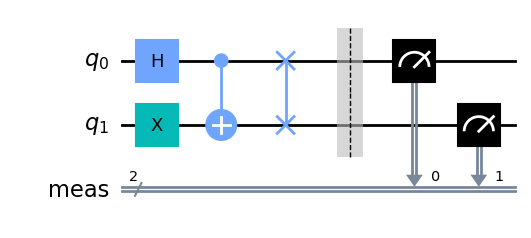

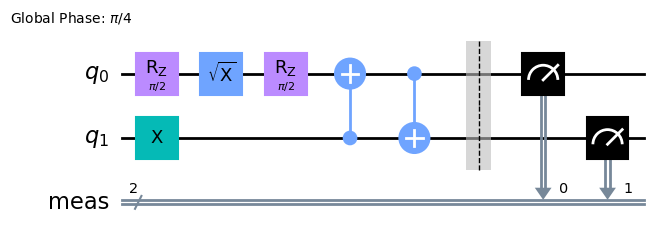

Job Status: job has successfully run


{'00': 4130, '01': 41844, '10': 52772, '11': 1254}

In [ ]:
#Looking at ibmq_lima in IBMQ website we see it uses the follwoing basis gates:CX, ID, RZ, SX, X
from qiskit import QuantumCircuit, transpile, execute
from qiskit_ibm_provider import IBMProvider
from qiskit.tools import job_monitor

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cnot(0,1)
qc.swap(0,1)
qc.measure_all()

display(qc.draw())

qc_trans = transpile(qc, basis_gates=["cx", "id", "rz", "sx", "x"])
display(qc_trans.draw())

provider = IBMProvider(instance="ibm-q/open/main")
be = provider.get_backend("ibmq_lima")

job = be.run(qc_trans, shots=100000)
job_monitor(job)
job.wait_for_final_state()
job.result().get_counts()

### Execute() and basis gates

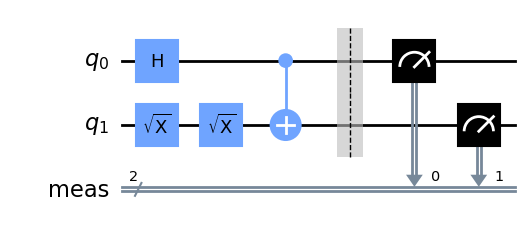

Job Status: job has successfully run


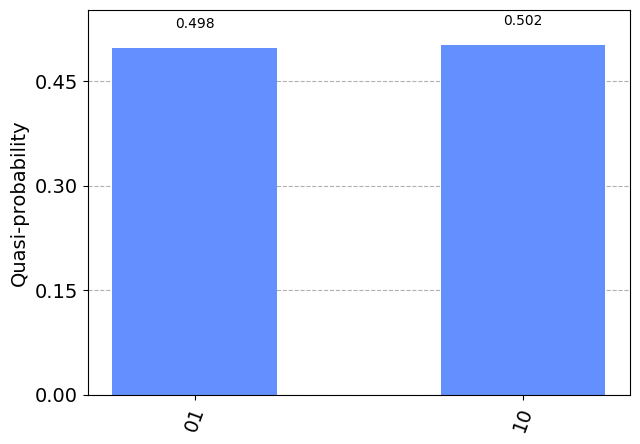

In [ ]:
from qiskit import QuantumCircuit, execute
from qiskit.tools import job_monitor
from qiskit.visualization import plot_distribution

qc = QuantumCircuit(2)
qc.h(0)
qc.sx(1)
qc.sx(1)
qc.cnot(0, -1)
qc.measure_all()

display(qc.draw())

provider = IBMProvider(instance="ibm-q/open/main")
be = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc, be, basis_gates= ["cx", "id", "rz", "sx", "x"],shots=10000)
job_monitor(job)

c = job.result().get_counts()
plot_distribution(c)

### Using optimization_level parameter
optimization goes from none (0) to most agressive one (3)

1 is the default

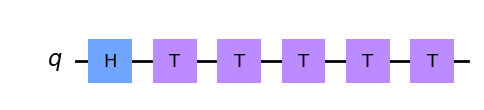

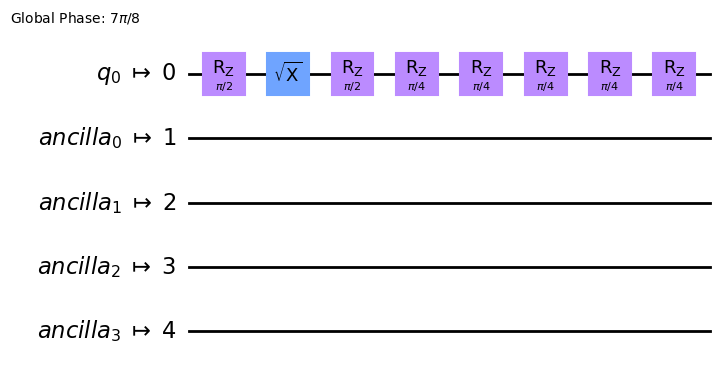

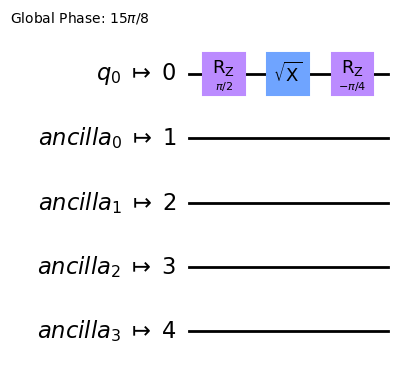

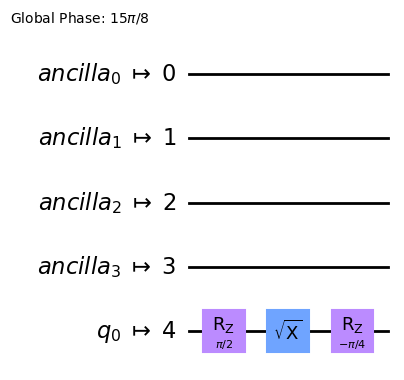

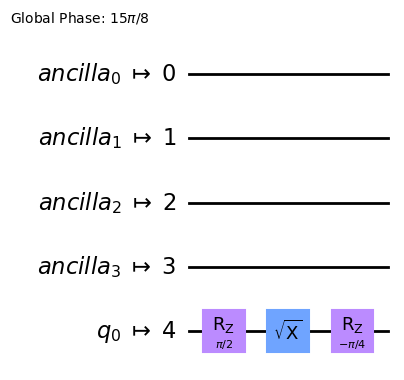

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider

qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.t(0)
qc.t(0)
qc.t(0)
qc.t(0)
display(qc.draw())

provider = IBMProvider(instance="ibm-q/open/main")
be = provider.get_backend("ibmq_quito")

qc_trans0 = transpile(qc, be, optimization_level=0)
qc_trans1 = transpile(qc, be, optimization_level=1)
qc_trans2 = transpile(qc, be, optimization_level=2)
qc_trans3 = transpile(qc, be, optimization_level=3)


display(qc_trans0.draw())
display(qc_trans1.draw())
display(qc_trans2.draw())
display(qc_trans3.draw())

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table